In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
import types
from ibm_botocore.client import Config
import ibm_boto3

warnings.filterwarnings('ignore')

%matplotlib inline

In [24]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_7886d8c8664241c895087c06d064eb78 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cy-2q5tup0tP3TZRDA6jrLrjlk5N8AN4bklltWHrACzV',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_7886d8c8664241c895087c06d064eb78.get_object(Bucket='housepricesadvancedregressiontech-donotdelete-pr-xspbt29nepkblo',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Target Analysis. 
## Target = SalePrice column

In [26]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

[Text(0,0.5,'Number'),
 Text(0.5,0,'Sale Price'),
 Text(0.5,1,'Histogram of Sale Price')]

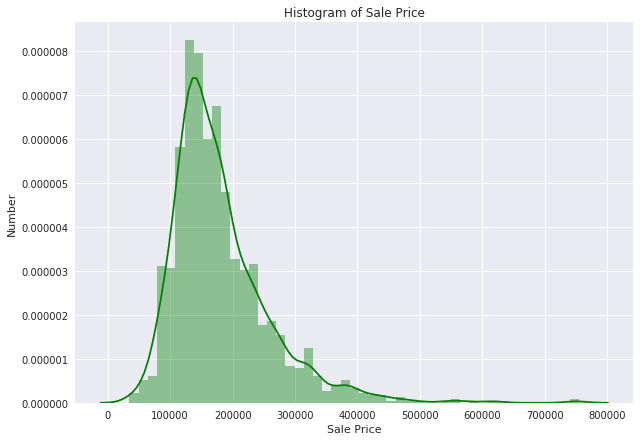

In [27]:
# Create a histogram to view skewness.
x = df['SalePrice']

plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.distplot(x, color='green')
ax.set(ylabel='Number', 
       xlabel='Sale Price', 
       title='Histogram of Sale Price')

[Text(0,0.5,'Number'),
 Text(0.5,0,'Sale Price'),
 Text(0.5,1,'Kernel Density of Sale Price')]

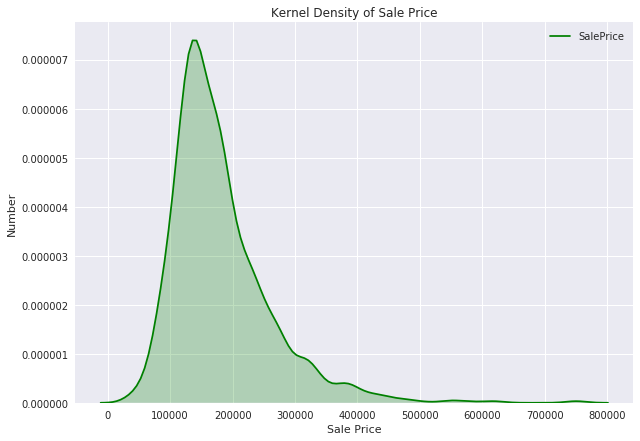

In [28]:
# Create a Kernel Density Plot to view skewness.
x = df['SalePrice']

plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.kdeplot(x, shade=True, color='green')
ax.set(ylabel='Number', 
       xlabel='Sale Price', 
       title='Kernel Density of Sale Price')

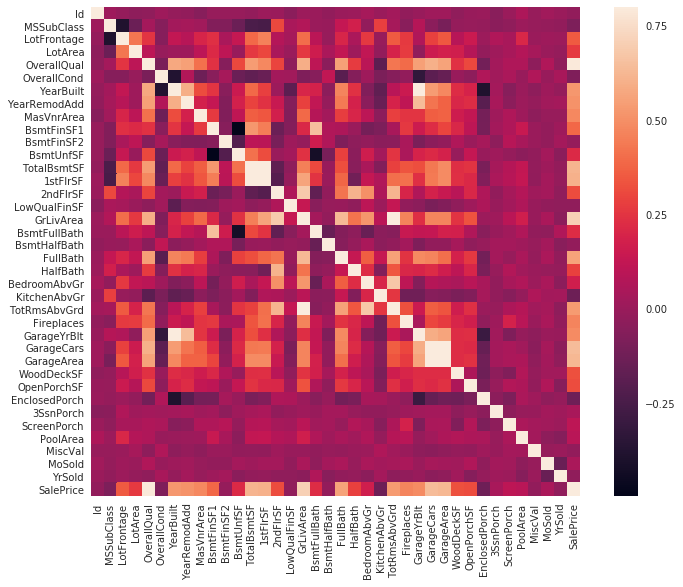

In [29]:
#correlation heatmap
corrmap = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmap, vmax=.8, square=True);

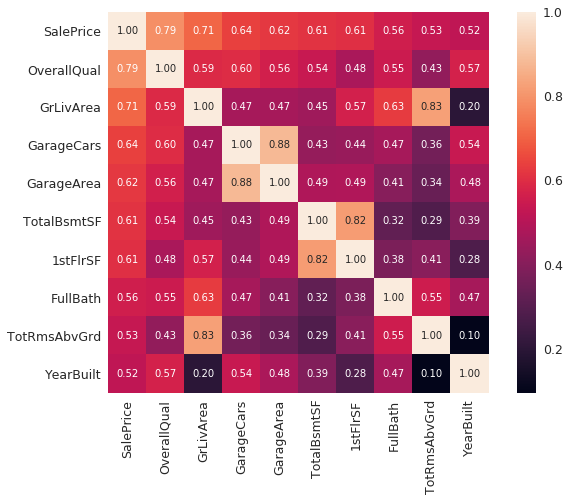

In [30]:
# Create a heatmap with the top 10 variables with the highest correlation with SalePrice
k = 10 #number of variables for heatmap
cols = corrmap.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10,7))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

- 'OverallQual', 'GrLivArea', and 'TotalBsmtSF' were strongly correlated with SalePrice. 
- 'GarageCars' and 'GarageArea' were also strongly correlated, however they are basically the same variable. The number of cars that fit in your garage will directl affect the area of your garage. 

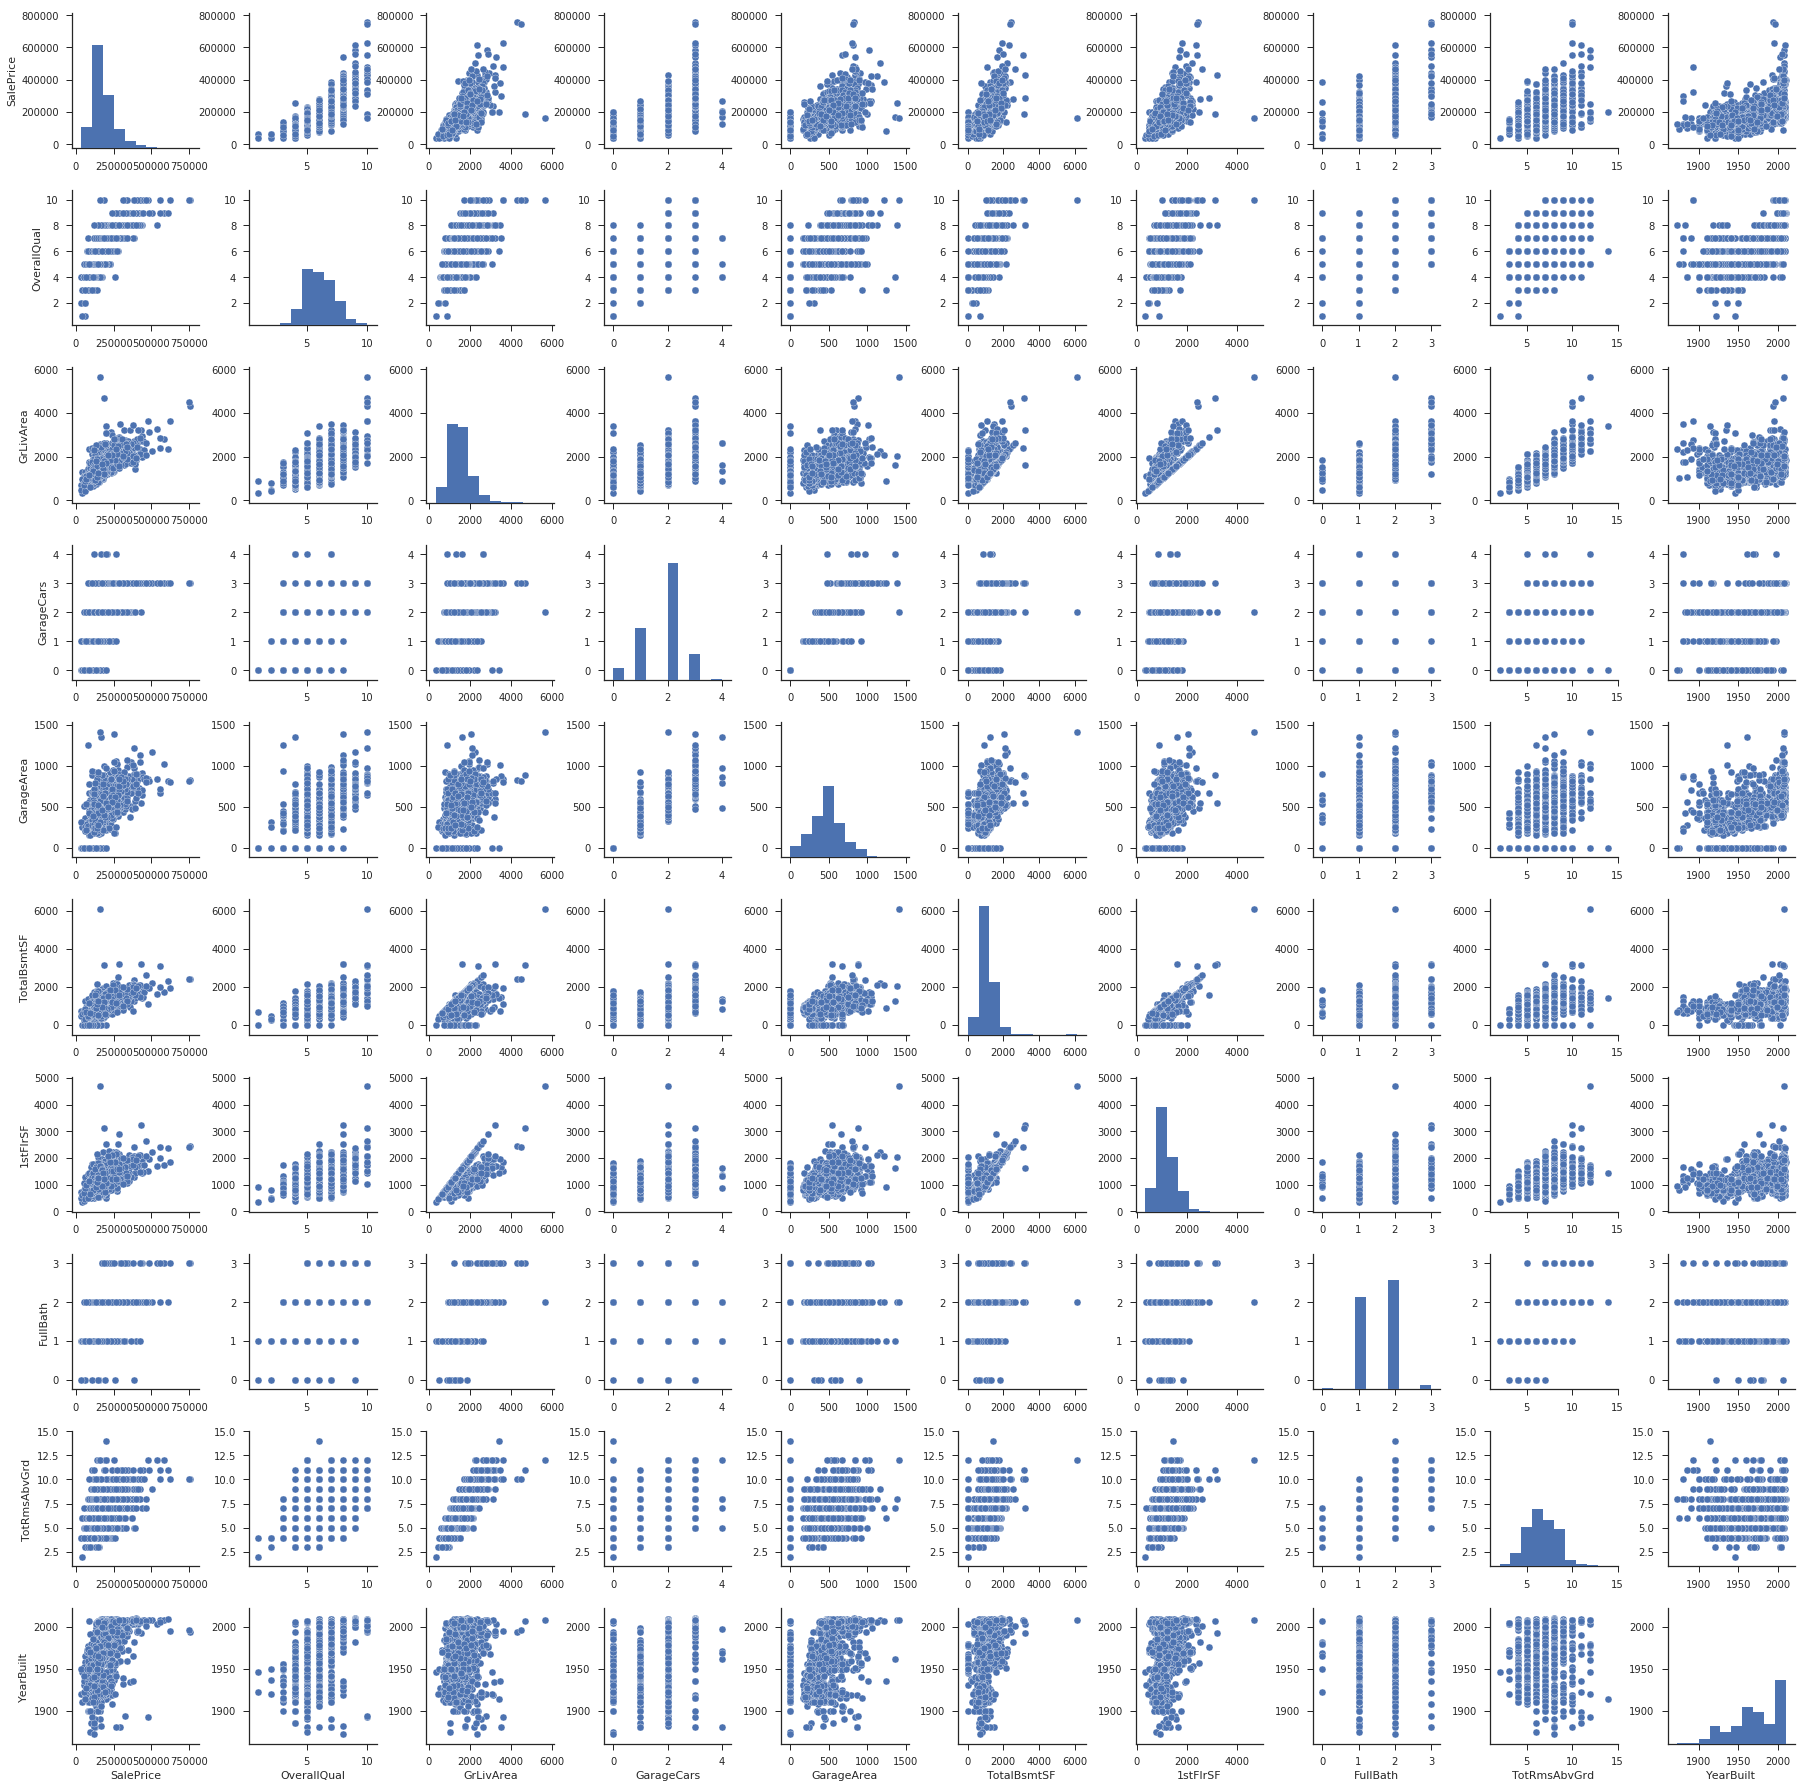

In [31]:
# create pairplots with the strongest correlated variables.
var = ['SalePrice', 'OverallQual','GrLivAres','GarageArea',
       'TotalBsmtSF','1stFlrSF','FullBath','TotRmAbvGrd','YearBuilt']
sns.set(style='ticks')
sns.pairplot(df[cols])
plt.show()

[Text(0,0.5,'Sale Price'),
 Text(0.5,0,'Overal Quality'),
 Text(0.5,1,'Sale Price and Overal Quality')]

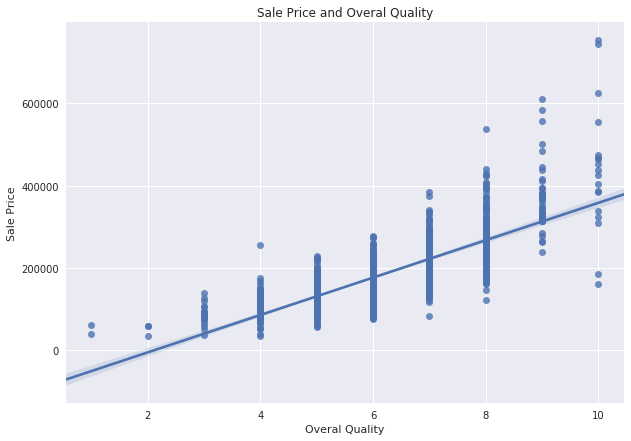

In [32]:
sns.set(color_codes=True)
plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.regplot(x='OverallQual', y='SalePrice', data=df)
ax.set(ylabel='Sale Price', 
       xlabel='Overal Quality', 
       title='Sale Price and Overal Quality')

[Text(0,0.5,'Sale Price'),
 Text(0.5,0,'Above Ground Living Area'),
 Text(0.5,1,'Sale Price and Living Area')]

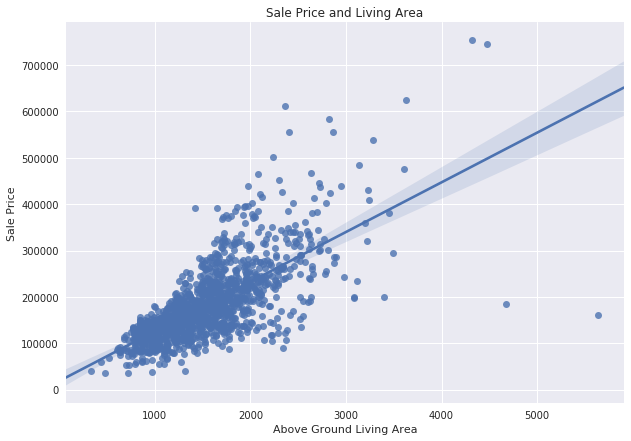

In [33]:
sns.set(color_codes=True)
plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.regplot(x='GrLivArea', y='SalePrice', data=df)
ax.set(ylabel='Sale Price', 
       xlabel='Above Ground Living Area', 
       title='Sale Price and Living Area')

The two points at the bottom right have large living areas and low sale prices. I am going to drop these two outliers for modeling later. 

In [37]:
# Delete the two outliers mentioned above. 
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<200000)].index)

[Text(0,0.5,'Sale Price'),
 Text(0.5,0,'Above Ground Living Area'),
 Text(0.5,1,'Sale Price and Living Area')]

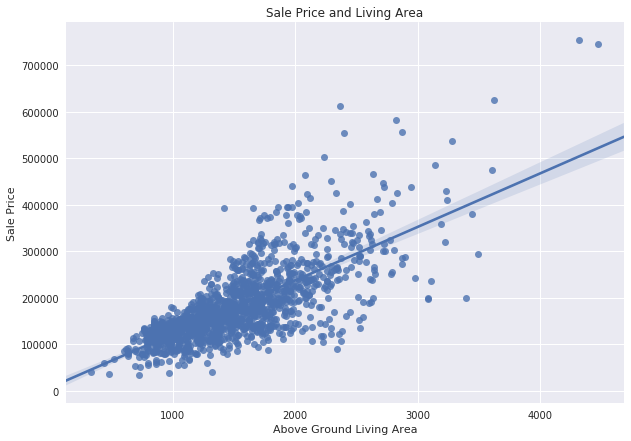

In [38]:
# Check and make sure the outliers are gone.
sns.set(color_codes=True)
plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.regplot(x='GrLivArea', y='SalePrice', data=df)
ax.set(ylabel='Sale Price', 
       xlabel='Above Ground Living Area', 
       title='Sale Price and Living Area')

[Text(0,0.5,'Sale Price'),
 Text(0.5,0,'Area of Garage'),
 Text(0.5,1,'Sale Price and Garage Size')]

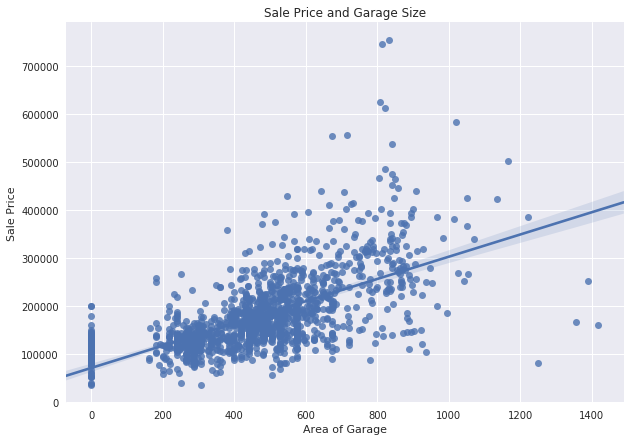

In [12]:
sns.set(color_codes=True)
plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.regplot(x='GarageArea', y='SalePrice', data=df)
ax.set(ylabel='Sale Price', 
       xlabel='Area of Garage', 
       title='Sale Price and Garage Size')

[Text(0,0.5,'Sale Price'),
 Text(0.5,0,'Area of Basement'),
 Text(0.5,1,'Sale Price and Basement Size')]

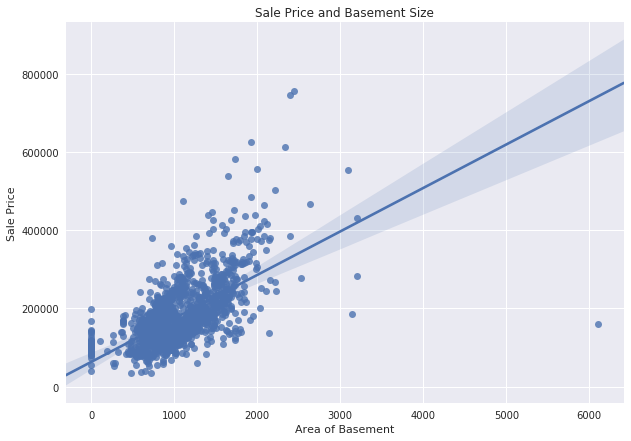

In [13]:
sns.set(color_codes=True)
plt.figure(figsize=(10,7))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
sns.set(font_scale = 1)
ax = sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df)
ax.set(ylabel='Sale Price', 
       xlabel='Area of Basement', 
       title='Sale Price and Basement Size')

In [14]:
df['YearBuilt'].min()

1872

In [15]:
df['YearBuilt'].max()

2010

In [16]:
# Change YearBuilt into decades in order to plot it out easier

def construction_decade(row):
    if row['YearBuilt'] >= 1870 and row['YearBuilt'] < 1880:
        return '1870'
    elif row['YearBuilt'] >= 1880 and row['YearBuilt'] < 1890:
        return '1880'
    elif row['YearBuilt'] >= 1890 and row['YearBuilt'] < 1900:
        return '1890'
    elif row['YearBuilt'] >= 1900 and row['YearBuilt'] < 1910:
        return '1900'
    elif row['YearBuilt'] >= 1910 and row['YearBuilt'] < 1920:
        return '1910'
    elif row['YearBuilt'] >= 1920 and row['YearBuilt'] < 1930:
        return '1920'
    elif row['YearBuilt'] >= 1930 and row['YearBuilt'] < 1940:
        return '1930'
    elif row['YearBuilt'] >= 1940 and row['YearBuilt'] < 1950:
        return '1940'
    elif row['YearBuilt'] >= 1950 and row['YearBuilt'] < 1960:
        return '1950'
    elif row['YearBuilt'] >= 1960 and row['YearBuilt'] < 1970:
        return '1960'
    elif row['YearBuilt'] >= 1970 and row['YearBuilt'] < 1980:
        return '1970'
    elif row['YearBuilt'] >= 1980 and row['YearBuilt'] < 1990:
        return '1980'
    elif row['YearBuilt'] >= 1990 and row['YearBuilt'] < 2000:
        return '1990'
    elif row['YearBuilt'] >= 2000 and row['YearBuilt']:
        return '2000'
    else:
        return '0'
    
df['DecadeBuilt'] = df.apply(lambda row: construction_decade(row), axis=1)

In [17]:
df['DecadeBuilt'].head()

0    2000
1    1970
2    2000
3    1910
4    2000
Name: DecadeBuilt, dtype: object

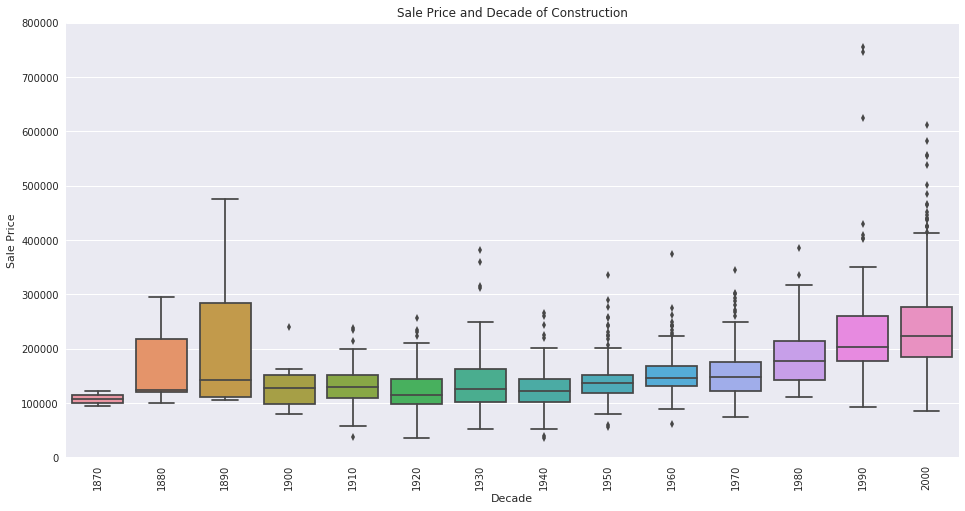

In [18]:
var = 'DecadeBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.boxplot(x=var, y="SalePrice", data=data)
ax.set(ylabel='Sale Price', 
       xlabel='Decade', 
       title='Sale Price and Decade of Construction')
ax.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# Fix any Missing Data

In [39]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageCond,81,0.055556
GarageType,81,0.055556
GarageYrBlt,81,0.055556
GarageFinish,81,0.055556


In [52]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [54]:
df = df.fillna("None", axis=1)

In [55]:
df.isnull().sum().sort_values(ascending=False).head(20)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
dtype: int64

# Normality

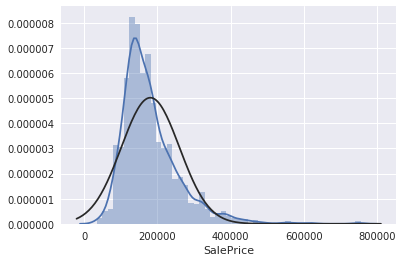

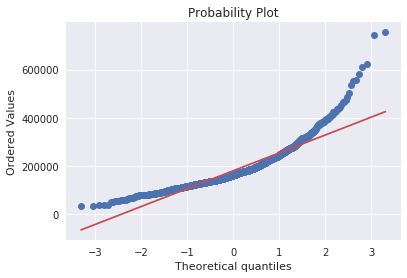

In [38]:
#histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

In [39]:
#applying log transformation
df['SalePrice'] = np.log(df['SalePrice'])

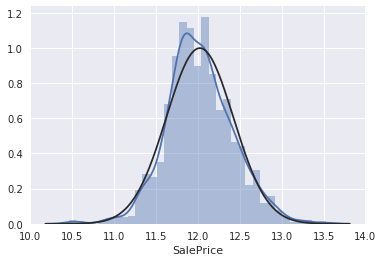

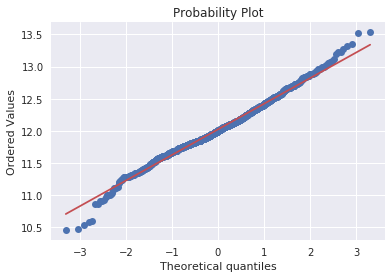

In [40]:
#transformed histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)